In [1]:
from sympy import *
from sympy.interactive import printing
printing.init_printing(use_latex=True)
%matplotlib inline

Re, Rm, omega0, q, B0, pi, Q, beta, c1, c2, u0, du0, k, xi = symbols("R_e R_m Omega_0 q B_0 pi Q beta c_1 c_2 u_0 du_0 k xi", real=True)
dt, dr, dz = symbols("d_t d_r d_z")
r, z, t  = symbols("r, z, t")
sigma = symbols("sigma")

psi = Function('psi')(t,r,z)
u = Function('u')(t,r,z)
A = Function('A')(t,r,z)
B = Function('B')(t,r,z)

psi21 = Function('psi_21')(t,r,z)
u21 = Function('u_21')(t,r,z)
A21 = Function('A_21')(t,r,z)
B21 = Function('B_21')(t,r,z)

psi11 = Function('psi_11')(t,r,z)
u11 = Function('u_11')(t,r,z)
A11 = Function('A_11')(t,r,z)
B11 = Function('B_11')(t,r,z)

#State vector matrix
V = Matrix([psi, u, A, B])

V21 = Matrix([psi21, u21, A21, B21])
V11 = Matrix([psi11, u11, A11, B11])


Assume

$\Omega(r) = c_1 + c_2 r^{-2}$

$\partial_r \Omega(r) = -2c_2 r^{-3}$

where $c_2 = r^2_1 r^2_2 (\Omega_1 - \Omega_2)/(r^2_2 - r^2_1)$

Note: rewriting all matrices so that they are defined for the LHS of the equation i.e. LV = 0. Also writing matrices in terms of $u_0 = r \Omega(r) = c_1 r + c_2/r$


In [2]:
L0 = Matrix([[-(1/Re)*((-3/r**4)*dr + (3/r**3)*dr**2 - (2/r**2)*dr**3+(1/r)*dr**4), 0, 0, 0],
            [0, -(1/Re)*(dr**2 + (1/r)*dr - (1/r**2)), 0, 0],
            [0, 0, -(1/Rm)*(dr**2 - (1/r)*dr), 0],
            [0, 0, 0, -(1/Rm)*(dr**2 + (1/r)*dr - (1/r**2))]])

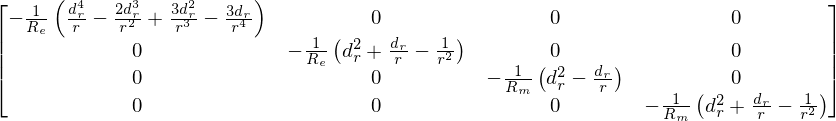

In [3]:
L0

In [4]:
#L1 = Matrix([[0, 3*omega0*r**(-q), (2/beta)*(1/r)*(dr**2 - (1/r)*dr), 0],
#             [-(4/r)*(omega0*r**(-q)) - (-q*omega0*r**(-q-1)), 0, 0, (2/beta)],
#             [1, 0, 0, 0],
#             [0, 1, (2/r)*(omega0*r**(-q)) + (-q*omega0*r**(-q-1)), 0]])

L1 = Matrix([[0, -(2/r)*u0, (2/beta)*((1/r**2)*dr - (1/r)*dr**2), 0],
             [(1/r**2)*u0 + (1/r)*du0, 0, 0, -(2/beta)],
             [-1, 0, 0, 0],
             [0, -1, (1/r**2)*u0 - (1/r)*du0, 0]])

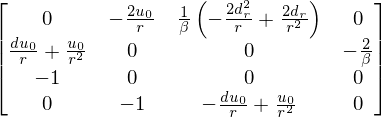

In [5]:
L1

In [6]:
L2 = Matrix([[-(1/Re)*((-2/r**2)*dr + (2/r)*dr**2), 0, 0, 0],
             [0, -1/Re, 0, 0],
             [0, 0, -1/Rm, 0],
             [0, 0, 0, -1/Rm]])

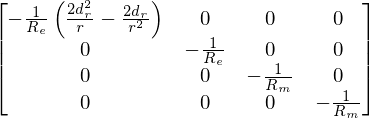

In [7]:
L2

In [8]:
L3 = Matrix([[0, 0, -(2/beta)*(1/r), 0],
             [0, 0, 0, 0],
             [0, 0, 0, 0],
             [0, 0, 0, 0]])

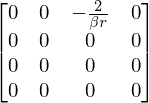

In [9]:
L3

In [10]:
L4 = Matrix([[-(1/Re)*(1/r), 0, 0, 0],
             [0, 0, 0, 0],
             [0, 0, 0, 0],
             [0, 0, 0, 0]])

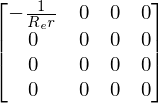

In [11]:
L4

In [12]:
G = Matrix([[0, 0, (2/beta)*((1/r**2)*dr - (1/r)*dr**2), 0],
             [0, 0, 0, -(2/beta)],
             [-1, 0, 0, 0],
             [0, -1, 0, 0]])

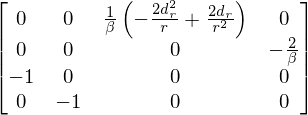

In [13]:
G

In [14]:
Gtwiddle = -G*dz - L3*dz**3

In [15]:
# Helical linear term
H = Matrix([[0, 0, 0, (2/beta)*(2/r**2)],
            [0, 0, 0, 0],
            [0, 0, 0, 0],
            [-(2/r**3), 0, 0, 0]])

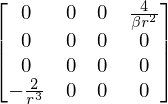

In [16]:
H

In [17]:
L = L0 + L1*dz + L2*dz**2 + L3*dz**3 + L4*dz**4

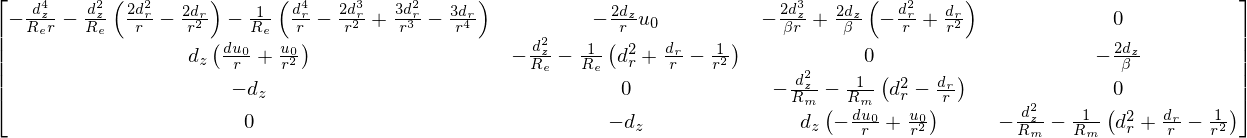

In [18]:
L

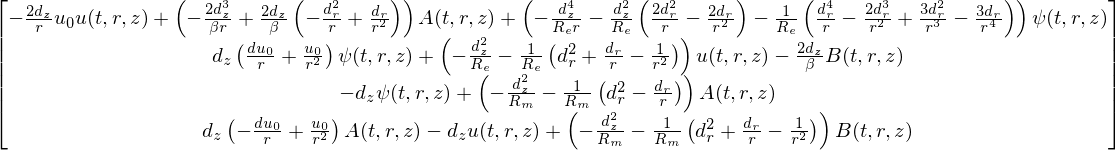

In [19]:
L*V

In [20]:
D = Matrix([[((1/r)*dz**2 + (1/r)*dr**2 - (1/r**2)*dr), 0, 0, 0],
             [0, 1, 0, 0],
             [0, 0, 1, 0],
             [0, 0, 0, 1]])

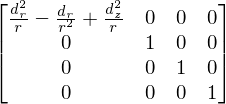

In [21]:
D

In [22]:
Identity_matrix = Matrix([[1, 0, 0, 0],
             [0, 1, 0, 0],
             [0, 0, 1, 0],
             [0, 0, 0, 1]])

In [23]:
#M = (L - sigma*Identity_matrix).subs(dz, 1j*Q)

In [24]:
#nokr = M.subs(dr, 0)

In [25]:
#nokr.det()

In [26]:
U = Matrix([0, 0, 0, B])

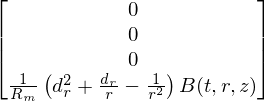

In [27]:
(dt*D*U - L*U).subs(dz, 0).subs(dt, 0)

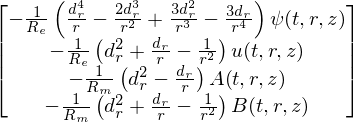

In [28]:
(L*V).subs(dz, 0)

In [29]:
L1twiddle = L1 + 2*L2*dz + 3*L3*dz**2 + 4*L4*dz**3

In [30]:
L2twiddle = L2 + 3*L3*dz + 6*L4*dz**2

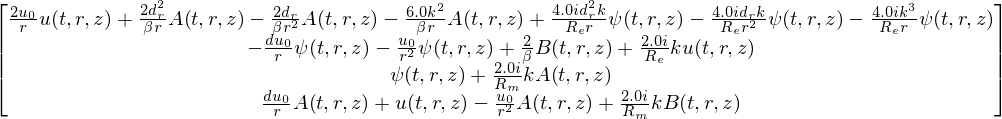

In [31]:
((-L1twiddle*V).subs(dz, 1j*k)).expand()

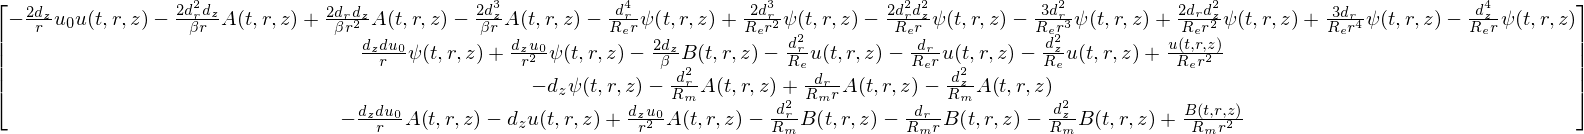

In [32]:
(L*V).expand()

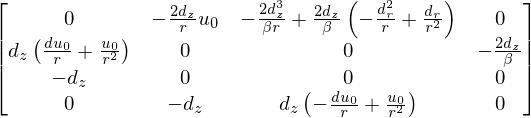

In [33]:
L_ideal = L1*dz + L3*dz**3
L_ideal

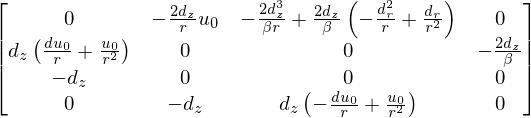

In [34]:
(L.subs((1/Re), 0)).subs((1/Rm), 0)

In [35]:
LH = ((L + xi*B0*dz*H).subs(dz, 1j*k))

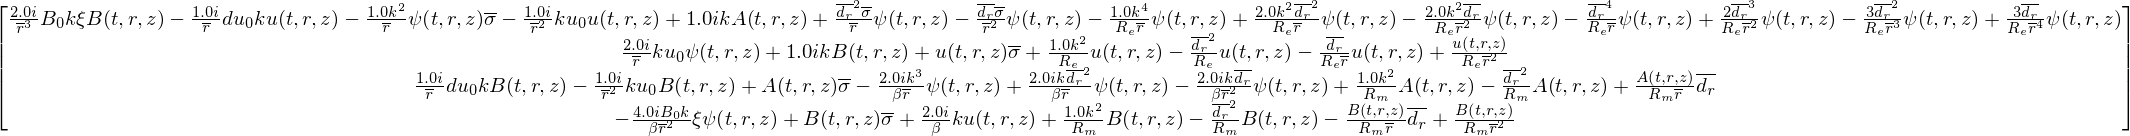

In [36]:
((sigma*D.subs(dz, 1j*k) + LH).adjoint()*V).expand()

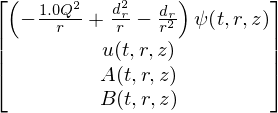

In [37]:
(D*V).subs(dz, 1j*Q)

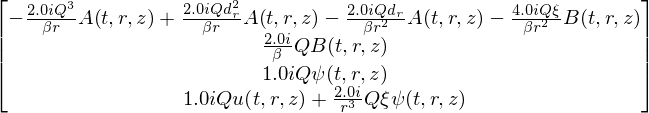

In [38]:
((Gtwiddle*V - xi*dz*H*V).subs(dz, 1j*Q)).expand()

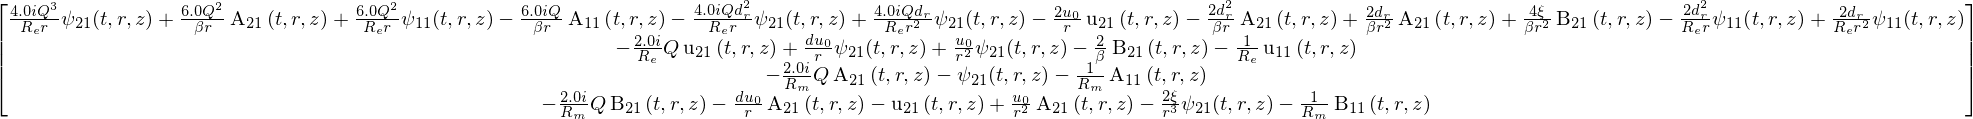

In [39]:
((L1twiddle*V21 + L2twiddle*V11 + xi*H*V21).subs(dz, 1j*Q)).expand()

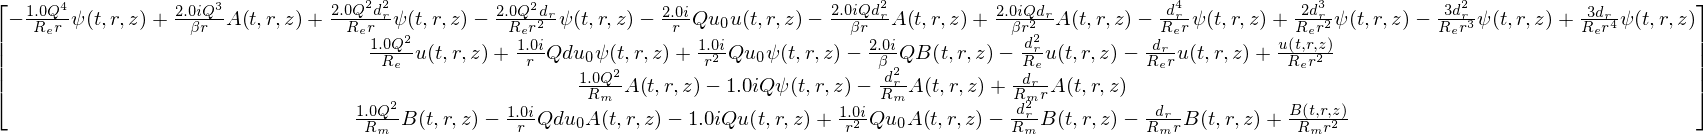

In [40]:
((L*V).subs(dz, 1j*Q)).expand()